In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_amelia = pd.read_csv("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/school_aged_children_ipt/historical_interventions/fig_2_access_use_timeseries.csv")

In [11]:
df_ssa = df_amelia[np.logical_and(df_amelia["iso3"]=="AFR", df_amelia["country_name"]=="SSA")]

Text(0.5, 1.0, 'Sub Saharan Africa')

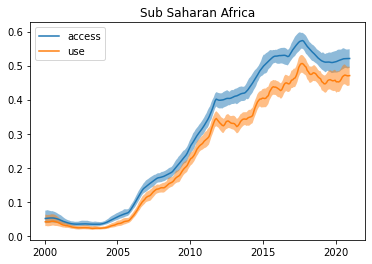

In [12]:
for v, sdf in df_ssa.groupby("variable"):
    plt.plot(sdf["time"], sdf["mean_among_atrisk"], label=v)
    plt.fill_between(sdf["time"], sdf["lower_among_atrisk"], sdf["upper_among_atrisk"], alpha=0.5)

plt.legend()
plt.title("Sub Saharan Africa")

Text(0, 0.5, 'use/access')

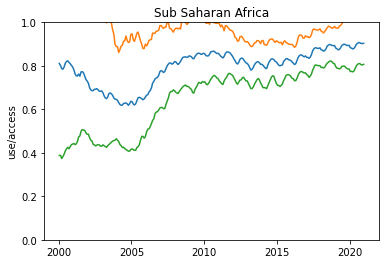

In [14]:
use = df_ssa[df_ssa["variable"]=="use"].reset_index(drop=True)
access = df_ssa[df_ssa["variable"]=="access"].reset_index(drop=True)

plt.plot(use["time"], use["mean_among_atrisk"]/access["mean_among_atrisk"])
plt.plot(use["time"], use["upper_among_atrisk"]/access["lower_among_atrisk"])
plt.plot(use["time"], use["lower_among_atrisk"]/access["upper_among_atrisk"])

plt.ylim([0,1])

plt.title("Sub Saharan Africa")
plt.ylabel("use/access")

We don't particularly care about access.  Even if everyone in the world had a net, what we really want to know for the burnin purposes is how many people are using their nets.

Note that use here is averaged over the entire population.  So "coverage" as set in the DTK is going to be set by the following:

< cov_DTK * age_usage * seasonal_usage > = < use_amelia >

Where:
- the < > brackets denote average over the year
- age_usage --> from demographic pyramid of SSA
- seasonal_usage --> differing by archetype

age_usage correction = 0.869 from https://paper.dropbox.com/doc/Cheat-sheet-xLRLgRWY9T5QrC1hyWX3K#:h2=Correcting-all-age-usage-to-de

Text(0, 0.5, 'use/access divided by age-dependent-usage correction of 0.869')

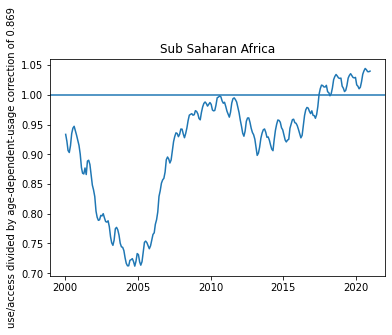

In [15]:
use = df_ssa[df_ssa["variable"]=="use"].reset_index(drop=True)
access = df_ssa[df_ssa["variable"]=="access"].reset_index(drop=True)

plt.plot(use["time"], use["mean_among_atrisk"]/access["mean_among_atrisk"]/0.869)

plt.axhline(1)

plt.title("Sub Saharan Africa")
plt.ylabel("use/access divided by age-dependent-usage correction of 0.869")

## Get spline of intervention scaleup, averaged by year

In [16]:
df_ssa_use = df_ssa[df_ssa["variable"]=="use"].reset_index(drop=True)

In [17]:
scaleup_df = df_ssa_use.groupby("year").agg({"mean_among_atrisk": "mean"}).reset_index()

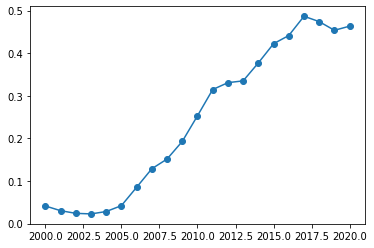

In [49]:
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"], marker='o')

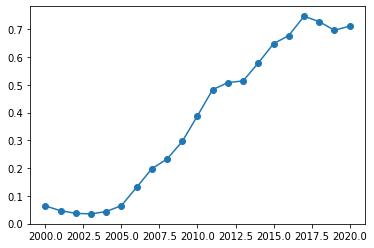

In [53]:
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"]/0.869/0.75, marker='o') 

## Check seasonal usage in Zambia

In [55]:
df_z = df_amelia_raw[df_amelia["country_name"]=="Zambia"]

Text(0.5, 1.0, 'Zambia')

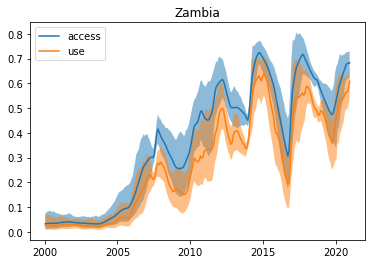

In [58]:
for v, sdf in df_z.groupby("variable"):
    plt.plot(sdf["time"], sdf["mean_among_atrisk"], label=v)
    plt.fill_between(sdf["time"], sdf["lower_among_atrisk"], sdf["upper_among_atrisk"], alpha=0.5)

plt.legend()
plt.title("Zambia")

Text(0, 0.5, 'use/access')

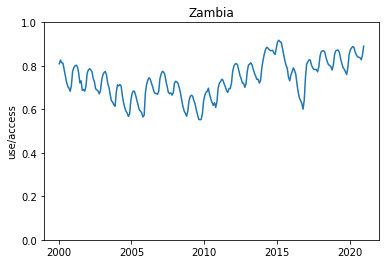

In [63]:
use = df_z[df_z["variable"]=="use"].reset_index(drop=True)
access = df_z[df_z["variable"]=="access"].reset_index(drop=True)

plt.plot(use["time"], use["mean_among_atrisk"]/access["mean_among_atrisk"])

plt.ylim([0,1])

plt.title("Zambia")
plt.ylabel("use/access")

In [69]:
use_rate_df = pd.merge(use[["year", "month", "time", "mean_among_atrisk"]].rename(columns={"mean_among_atrisk": "use"}),
                   access[["year", "month", "time", "mean_among_atrisk"]].rename(columns={"mean_among_atrisk": "access"}),
                   on=["year", "month", "time"])
use_rate_df["use_rate"] = use_rate_df["use"]/use_rate_df["access"]

(1.0, 12.0)

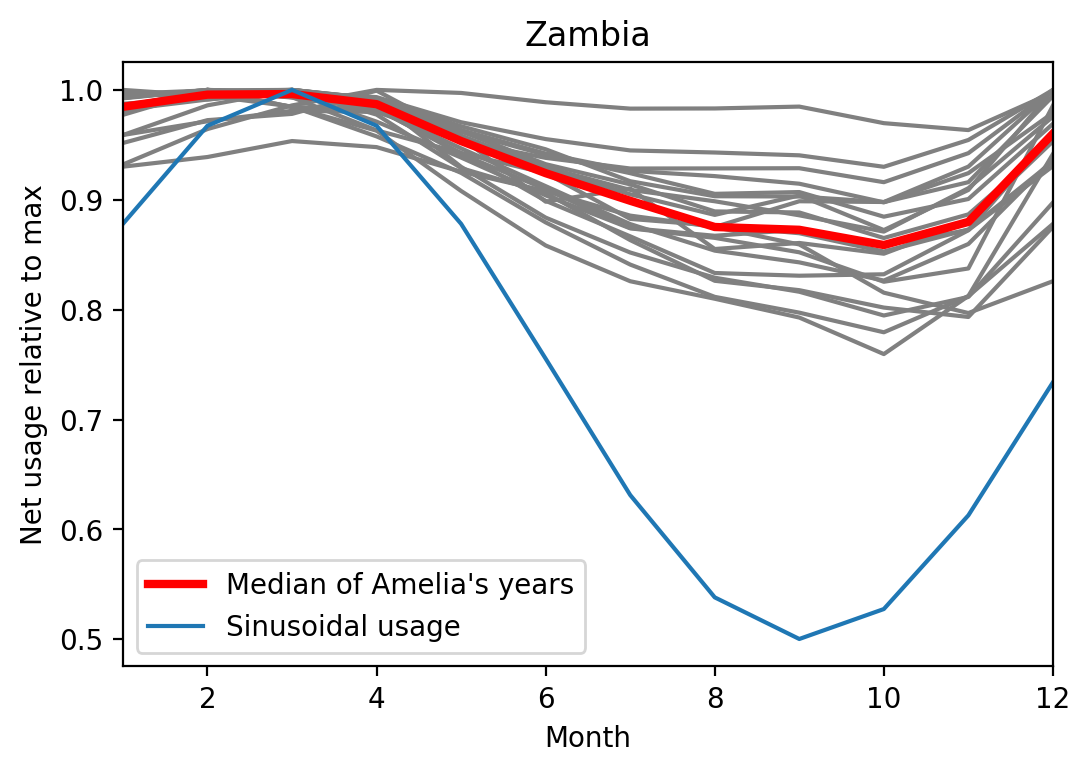

In [93]:
plt.figure(dpi=200)

df_list = []
for y,sdf in use_rate_df.groupby("year"):
    plt.plot(sdf["month"],sdf["use_rate"]/np.max(sdf["use_rate"]), color='gray')
    sdf["use_rate_norm"] = sdf["use_rate"]/np.max(sdf["use_rate"])

    df_list.append(sdf)
    
use_rate_full_df = pd.concat(df_list)
use_rate_spline = use_rate_full_df.groupby("month").agg({"use_rate_norm": "median"}).reset_index()
plt.plot(use_rate_spline["month"], use_rate_spline["use_rate_norm"], lw=3, color='red', label="Median of Amelia's years")

plt.plot(np.arange(1,13), np.array([0.8780928530321059,0.9673973473366527,1.0,0.9673973473366527,0.8780928530321059,0.7553790243590556,0.6312622319832375,0.5381147692767922,0.5002314712244424,0.5274931058913308,0.6127892604288201,0.7338728876376707]), label="Sinusoidal usage")
plt.legend()
plt.xlabel("Month")
plt.ylabel("Net usage relative to max")
plt.title("Zambia")
plt.xlim([1,12])

In [76]:
use_rate_full_df

,year,month,time,use,access,use_rate,use_rate_norm
0,2000,1,2000.038251,0.026175,0.032342,0.809318,0.978920
1,2000,2,2000.122951,0.027245,0.032955,0.826746,1.000000
2,2000,3,2000.202186,0.027374,0.033635,0.813873,0.984429
3,2000,4,2000.286885,0.027831,0.034251,0.812548,0.982827
4,2000,5,2000.368852,0.027030,0.034532,0.782736,0.946768
...,...,...,...,...,...,...,...
247,2020,8,2020.620219,0.554168,0.660031,0.839609,0.943012
248,2020,9,2020.704918,0.564785,0.674507,0.837331,0.940453
249,2020,10,2020.786885,0.563652,0.680715,0.828030,0.930006
250,2020,11,2020.871585,0.578775,0.681098,0.849767,0.954421


In [ ]:
use = df_z[df_z["variable"]=="use"].reset_index(drop=True)
access = df_z[df_z["variable"]=="access"].reset_index(drop=True)

plt.plot(use["time"], use["mean_among_atrisk"]/access["mean_among_atrisk"])

plt.ylim([0,1])

plt.title("Zambia")
plt.ylabel("use/access")

## Seasonal usage by archetype

### Southern

Southern

    "Southern": {'min_cov': 0.5,
                 'max_day': 60},
                 
Simple sinusoid, so average = 0.75

In [2]:
# Correction factor for Southern
1/0.869/0.75

1.5343306482546988

In [4]:
# Correction factor for Central (no seasonality in net usage)
1/0.869/0.8

1.4033512026719808

Text(0.5, 0, 'Year')

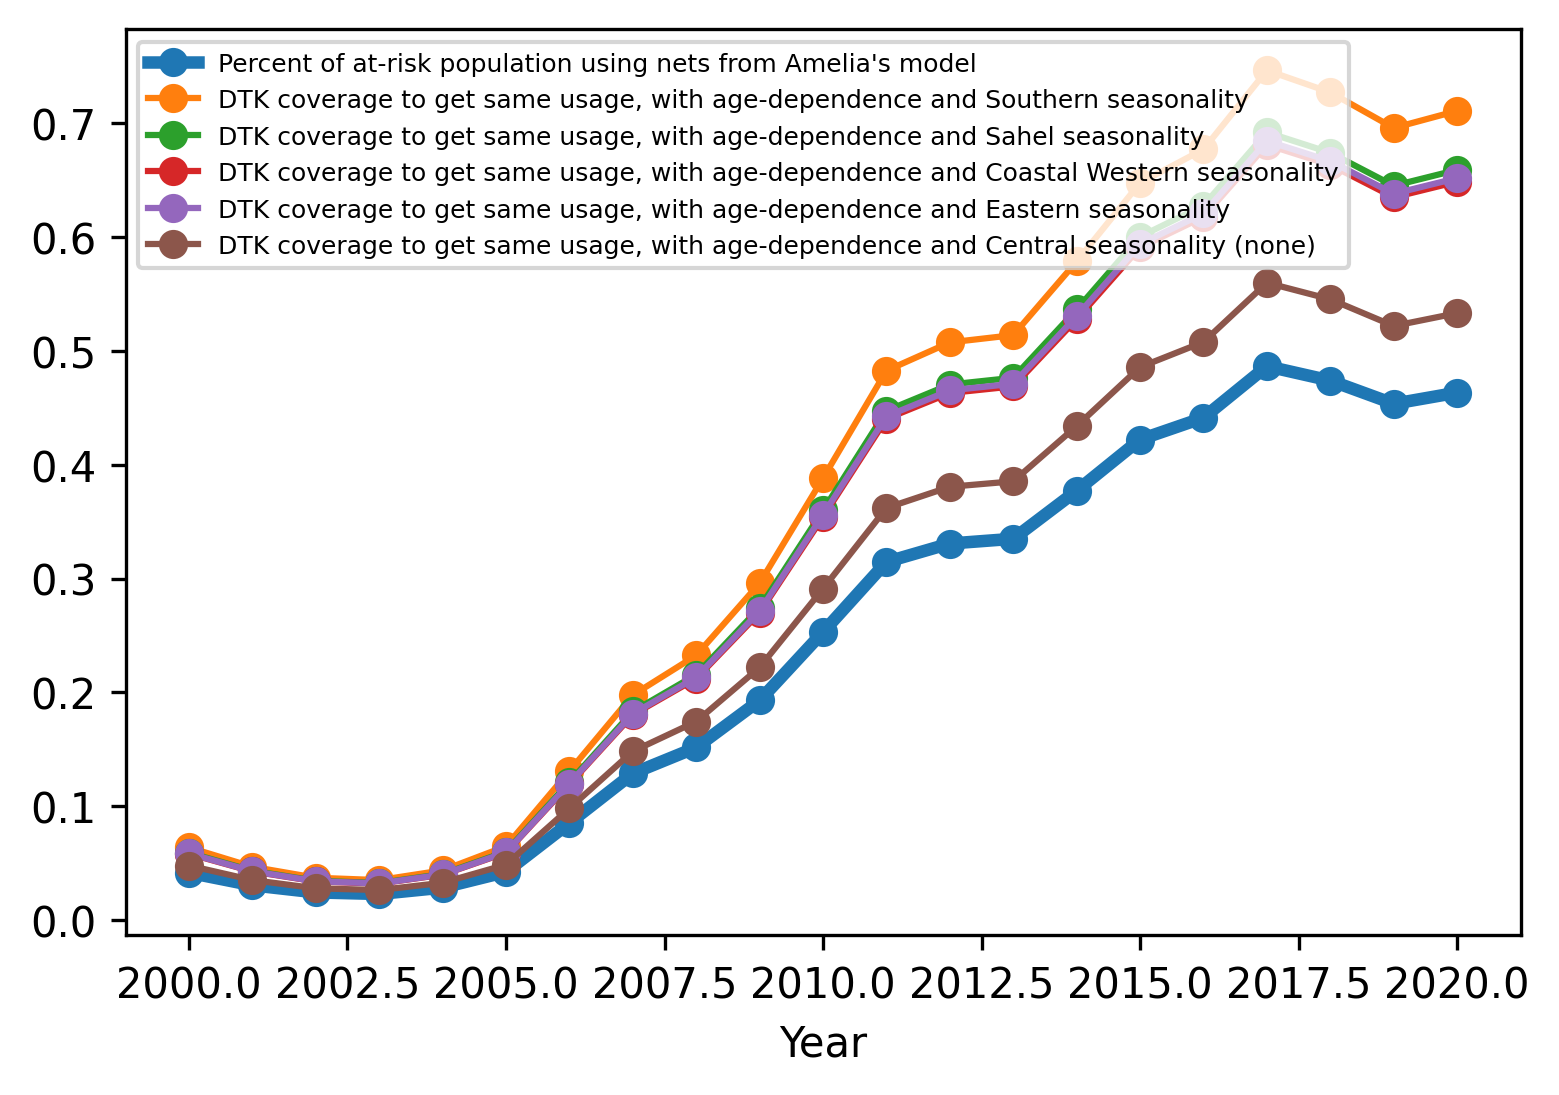

In [34]:
plt.figure(dpi=300)

plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"], marker='o', label="Percent of at-risk population using nets from Amelia's model", lw=3)
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"]/0.869/0.75, marker='o', label="DTK coverage to get same usage, with age-dependence and Southern seasonality") 
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"]/0.869/0.809, marker='o', label="DTK coverage to get same usage, with age-dependence and Sahel seasonality") 
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"]/0.869/0.822, marker='o', label="DTK coverage to get same usage, with age-dependence and Coastal Western seasonality")
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"]/0.869/0.818, marker='o', label="DTK coverage to get same usage, with age-dependence and Eastern seasonality")
plt.plot(scaleup_df["year"], scaleup_df["mean_among_atrisk"]/0.869/1.0, marker='o', label="DTK coverage to get same usage, with age-dependence and Central seasonality (none)") 

plt.legend(fontsize=6)

plt.xlabel("Year")